## Locally Weighted Regression

1) Read and Normalize the dataset 

2) Generate W for every query point

3) No training is involved, directly make predictions using the closed form solution

- `(X'WX)inv * XWY` where X' is X_Transpose

4) Find the best value of Tau(Bandwidth Hyperparameter)[Cross Validation]

# Loading Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
dfx = pd.read_csv("./Linear Regression/Training Data/Linear_X_Train.csv")
dfy = pd.read_csv("./Linear Regression/Training Data/Linear_Y_Train.csv")

In [3]:
x = dfx.values
y = dfy.values

In [4]:
x.shape, y.shape

((3750, 1), (3750, 1))

In [5]:
x

array([[-0.28930742],
       [-0.58880963],
       [ 1.02750749],
       ...,
       [-0.30516366],
       [ 1.67583291],
       [-0.49175724]])

In [6]:
plt.style.use("seaborn")

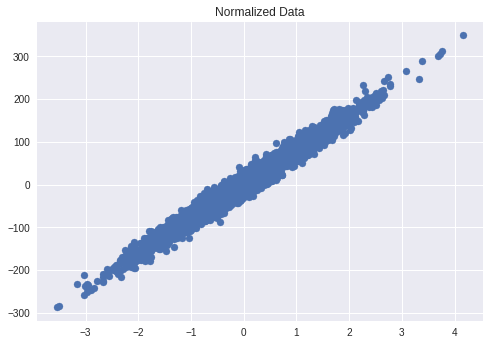

In [7]:
# Normalize the data

u = x.mean()
std = x.std()
x = (x - u)/std

plt.title("Normalized Data")
plt.scatter(x,y)
plt.show()

In [8]:
type(np.mat(np.eye(5)))
# a*b --> a,b -> matrices --> Matrix multiplication
# a*b --> a,b --> arrays --> Element wise multiplication

numpy.matrix

# 2. Find out W (mxm) diagonal matrix

In [9]:
x.shape

(3750, 1)

In [10]:
m = x.shape[0]
w = np.mat(np.eye(m))
m,w    

(3750,
 matrix([[1., 0., 0., ..., 0., 0., 0.],
         [0., 1., 0., ..., 0., 0., 0.],
         [0., 0., 1., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 1., 0., 0.],
         [0., 0., 0., ..., 0., 1., 0.],
         [0., 0., 0., ..., 0., 0., 1.]]))

In [11]:
def getW(query_point,x,tau):
    m = x.shape[0]
    w = np.mat(np.eye(m))
    
    for i in range(m):
        xi = x[i]
        x = query_point
        print(xi)
        print(x)
        w[i,i] = np.exp(np.dot((xi - x), (xi - x).T)//(-2*tau*tau))
    return w

In [12]:
x = np.mat(x)
y = np.mat(y)
m = x.shape[0]
W = getW(-1,x,1)
print(W)

[[-0.25352061]]
-1


TypeError: 'int' object is not subscriptable